# Predict Sales by building an end-to-end machine learning pipeline. It includes –

1)      Data Preprocessing

2)      Data Exploration

3)      Feature Engineering

4)      Model Building

5)      Model Evaluation

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing,Data Exploration and Feature Engineering

In [250]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
train['type'] = 'train'
test['type'] = 'test'
test['Item_Outlet_Sales'] = 0
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 13) (14204, 13)


In [12]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [13]:
df['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

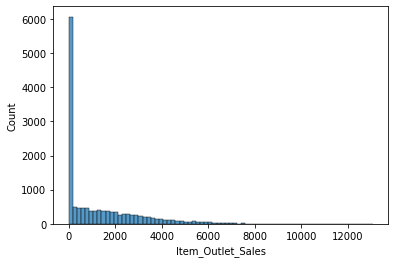

In [31]:
sns.histplot(df['Item_Outlet_Sales'])

In [33]:
print('Skewness: %f' % df['Item_Outlet_Sales'].skew())

Skewness: 1.544684


In [34]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
type                          object
dtype: object

In [37]:
categorial_features = df.select_dtypes(include=object)
categorial_features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test


In [40]:
numerical_features = df.select_dtypes(include=np.number)
numerical_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,0.0000
14200,7.60,0.142991,169.1448,2009,0.0000
14201,10.00,0.073529,118.7440,2002,0.0000
14202,15.30,0.000000,214.6218,2007,0.0000


In [43]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
type                            0
dtype: int64

In [44]:
df.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
type                             2
dtype: int64

In [46]:
#frequency of numerical columns
for col in numerical_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())


Item_Weight column: 
17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Item_Weight, Length: 415, dtype: int64

Item_Visibility column: 
0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

Item_MRP column: 
172.0422    8
179.7660    7
127.1020    7
177.9370    7
123.1046    7
           ..
176.9712    1
253.6014    1
118.4808    1
230.8010    1
192.0188    1
Name: Item_MRP, Length: 8052, dtype: int64

Outlet_Establishment_Year column: 
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Item_Outlet_Sales column: 
0.0000       5681
958.7520       17
1342.2528      16
1845.5976      15
703.0848   

In [45]:
#frequency of categories
for col in categorial_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())


Item_Identifier column: 
FDP25    10
DRH23    10
NCH42    10
FDN21    10
FDC32    10
         ..
NCW54     7
DRN11     7
FDI46     7
FDH58     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548


<AxesSubplot:>

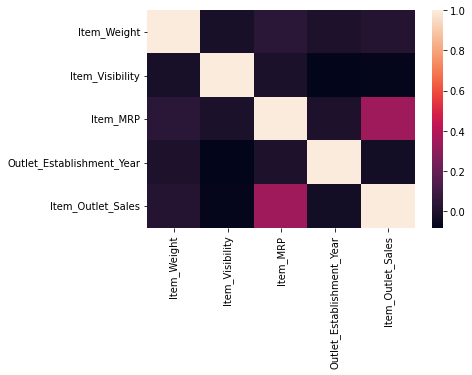

In [53]:
sns.heatmap(df.corr())

In [51]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.019447
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.075008
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.075008,0.342781,-0.029489,1.000000


In [56]:
# Cross tabulation b/w outlet size and sales
CrosstabResult=pd.crosstab(df['Outlet_Size'],df['Item_Outlet_Sales'])
print(CrosstabResult)

Item_Outlet_Sales  0.0000      33.9558     34.6216     36.6190     37.2848     \
Outlet_Size                                                                     
High                      621           0           0           0           0   
Medium                   1862           0           0           0           0   
Small                    1592           1           1           1           1   

Item_Outlet_Sales  37.9506     38.6164     39.9480     40.6138     41.2796     \
Outlet_Size                                                                     
High                        0           0           0           0           0   
Medium                      0           0           0           0           0   
Small                       4           2           1           2           2   

Item_Outlet_Sales  ...  9678.0688   9779.9362   10072.8882  10236.6750  \
Outlet_Size        ...                                                   
High               ...           0      

In [55]:
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.3144824669799977


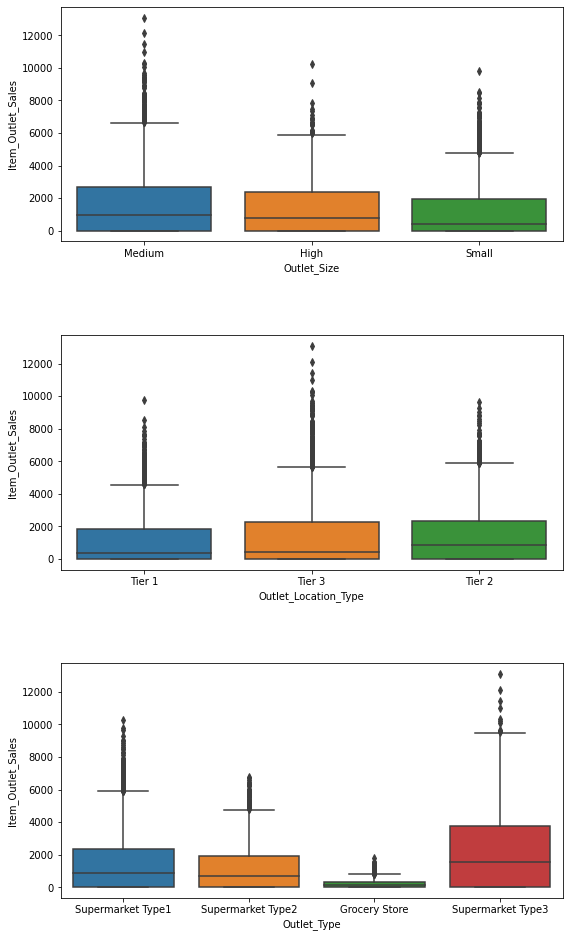

In [59]:
plt.figure(figsize = (9,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

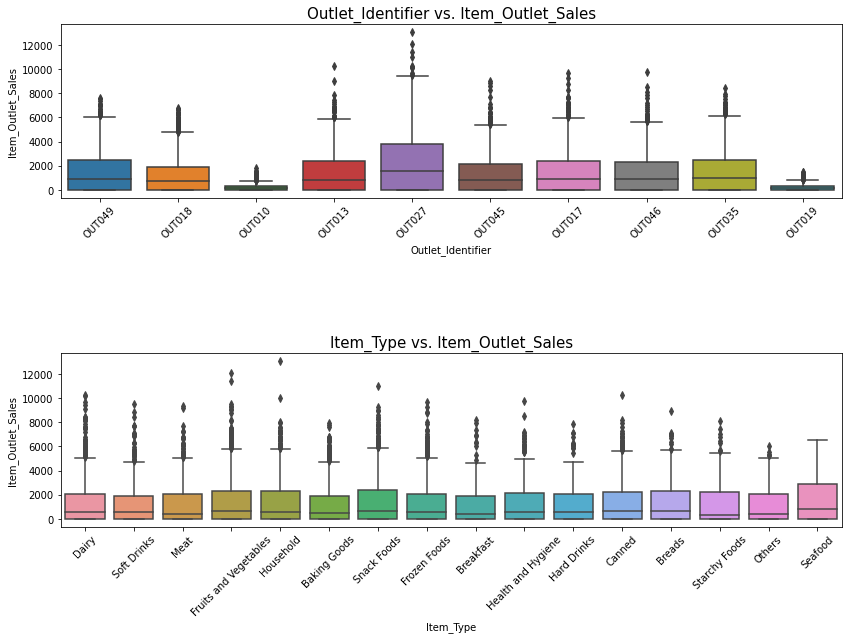

In [63]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


### Handling missing values

In [65]:
df['Item_Weight'].isna().sum()

2439

In [69]:
df['Item_Weight'].mean()

12.792854228644991

In [70]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [71]:
df['Item_Weight'].isna().sum()

0

In [73]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [104]:
data=df.copy()

In [105]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [106]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
type                            0
dtype: int64

In [107]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0000,test


### Replace 0's of visibility with mean

In [108]:
data['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [109]:
data['Item_Visibility']=data['Item_Visibility'].replace(0,data['Item_Visibility'].mean())

In [110]:
data['Item_Visibility'].value_counts()

0.065953    879
0.076841      3
0.077290      3
0.077169      3
0.076792      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.115072      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [111]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.065953,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0000,test


### Dealing with item_type and fat_content

In [112]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [113]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [114]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test,Food
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test,Food
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0000,test,Non-Consumable
14202,FDJ26,15.30,Regular,0.065953,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0000,test,Food


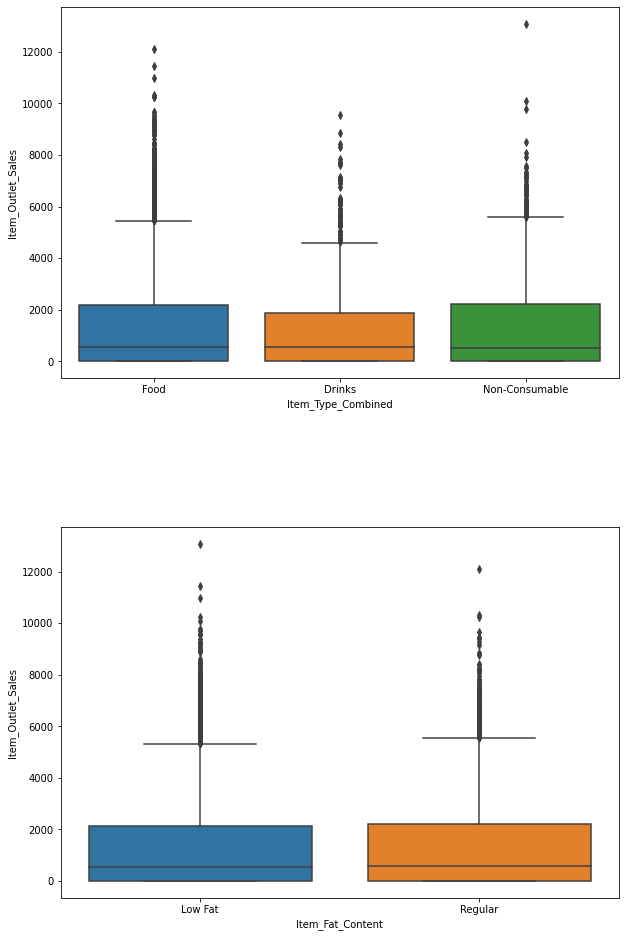

In [115]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data)

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

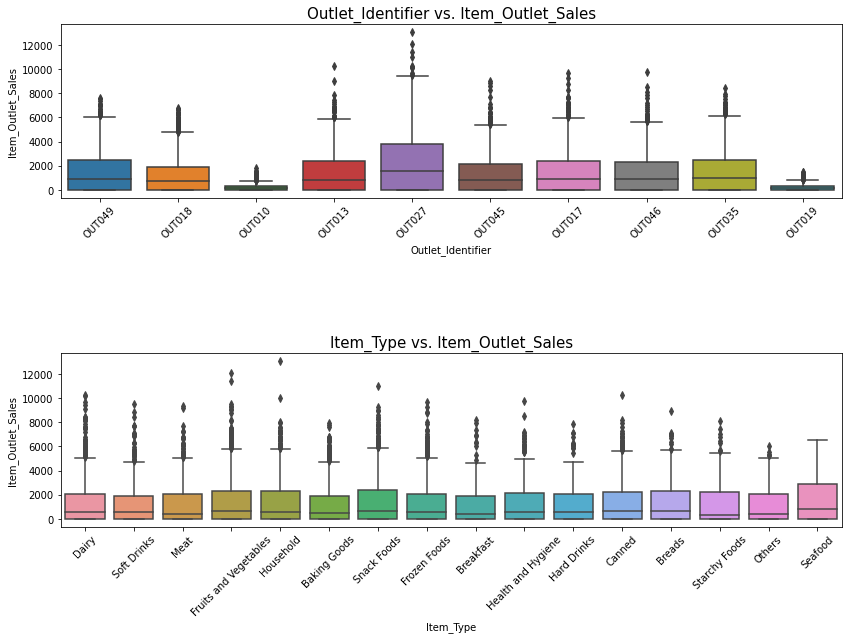

In [116]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data)
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data)
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

### Calculating years of operation of a store

In [117]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

24    2439
22    1553
5     1550
12    1550
10    1550
7     1548
0     1546
2     1543
11     925
Name: Outlet_Years, dtype: int64

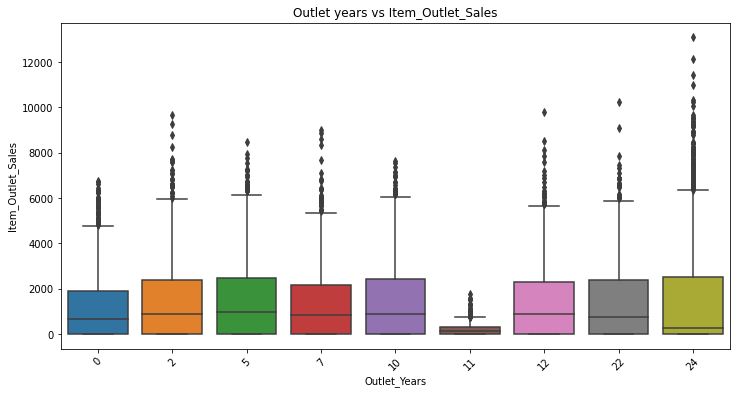

In [118]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
plt.show()

In [119]:
##Explaining why for 1998 the sales were less
temp_data = data.loc[data['Outlet_Establishment_Year'] == 1998]

In [120]:
temp_data['Outlet_Type'].value_counts()

Grocery Store    925
Name: Outlet_Type, dtype: int64

As we can see there is only Grocery Store Type as Outlet_Type
thus Item_Outlet_Sale is minimum.

In [121]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,10
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,11
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test,Food,12
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test,Food,0
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0000,test,Non-Consumable,7
14202,FDJ26,15.30,Regular,0.065953,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0000,test,Food,2


**Numerical and One-Hot Coding of Categorical variables**

In [122]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet_Identifier'])

In [123]:
pd.set_option("max_columns", None)

In [124]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,type,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,train,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,train,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,train,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,1998,732.3800,train,11,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.065953,Household,53.8614,1987,994.7052,train,22,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,1997,0.0000,test,12,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,2009,0.0000,test,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,2002,0.0000,test,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.065953,Canned,214.6218,2007,0.0000,test,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [125]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
type                                  object
Outlet_Years                           int64
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_

In [126]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['type']=="train"]
test = data.loc[data['type']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','type'],axis=1,inplace=True)
train.drop(['type'],axis=1,inplace=True)

C:\Users\Public\anaconda\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [127]:
data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,type,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0.016047,249.8092,3735.1380,train,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,train,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,train,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,19.20,0.065953,182.0950,732.3800,train,11,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,8.93,0.065953,53.8614,994.7052,train,22,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,0.0000,test,12,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14200,7.60,0.142991,169.1448,0.0000,test,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
14201,10.00,0.073529,118.7440,0.0000,test,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
14202,15.30,0.065953,214.6218,0.0000,test,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [128]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Modeling and Evaluation

In [129]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [130]:
# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [131]:
train2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0.016047,249.8092,3735.1380,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,19.20,0.065953,182.0950,732.3800,11,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,8.93,0.065953,53.8614,994.7052,22,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [132]:
test2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.750000,0.007565,107.8622,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,8.300000,0.038428,87.3198,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,11,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,7.315000,0.015388,155.0340,2,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,12.792854,0.118599,234.2300,24,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [133]:
X = train2.drop(['Item_Outlet_Sales'], axis=1)
y = train2.Item_Outlet_Sales

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [135]:
X_test_real = test2

In [136]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
2670,18.600000,0.076975,161.8236,10,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7983,13.850000,0.030843,143.1154,10,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7784,15.100000,0.055829,140.2496,5,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1827,12.792854,0.248302,124.1072,24,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6538,20.850000,0.021417,104.6306,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [137]:
y_train.head()

2670    1611.2360
7983    2552.6772
7784    2681.8424
1827     245.0144
6538    1149.8366
Name: Item_Outlet_Sales, dtype: float64

In [194]:
rmse_dict={}

### Fitting Decision Tree Regression to the dataset

In [190]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [191]:
# Predicting on the splitted test set
y_pred = regressor.predict(X_test)
y_pred

array([1121.81846781, 3153.788072  ,  199.62006374, ..., 2398.43087545,
       3153.788072  , 1626.49028034])

In [192]:
##Test score
accuracy_dt = round(regressor.score(X_test,y_test),2)
accuracy_dt

0.56

In [195]:
rmse_dt=np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE : %.4g" %rmse_dt )

RMSE : 1132


In [196]:
rmse_dict['rmse_dt']=rmse_dt

In [197]:
# Predicting on the real test set
y_pred = regressor.predict(X_test_real)
y_pred

array([1626.49028034, 1387.22212755,  476.66048714, ..., 1933.9242925 ,
       3713.20746137, 1121.81846781])

In [198]:
##Training score
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.58

In [199]:
r2_score(y_train, regressor.predict(X_train))

0.5822979422044914

In [200]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1103


### Fitting Random Forest Regression to the dataset

In [201]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [202]:
# Predicting on the splitted test set
y_pred = regressor.predict(X_test)
y_pred

array([ 918.13954766, 3039.85739343,   98.14309072, ..., 2364.13074319,
       3109.18619903, 1530.57074838])

In [203]:
##Test score
accuracy_rf = round(regressor.score(X_test,y_test),2)
accuracy_rf

0.6

In [204]:
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE : %.4g" %rmse_rf)

RMSE : 1086


In [205]:
rmse_dict['rmse_rf']=rmse_rf

In [206]:
# Predicting the real test set
y_pred = regressor.predict(X_test_real)
y_pred

array([1660.67207891, 1364.02689546,  601.61012212, ..., 1941.45184931,
       3750.41924556, 1271.32774783])

In [207]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [208]:
r2_score(y_train, regressor.predict(X_train))

0.6141418089364885

In [209]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1060


### Fitting Linear Regression to the training set

In [210]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [211]:
# Predicting on the splitted test set
y_pred = regressor.predict(X_test)
y_pred

array([  974.07833243,  3014.51149132, -1179.50190281, ...,
        2197.53236008,  3091.75440931,  1560.75931061])

In [212]:
##Test score
accuracy_lr = round(regressor.score(X_test,y_test),2)
accuracy_lr

0.56

In [214]:
rmse_lr=np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE : %.4g" %rmse_lr)

RMSE : 1128


In [216]:
rmse_dict['rmse_lr']=rmse_lr

In [217]:
# Predicting the real test set
y_pred = regressor.predict(X_test_real)

In [218]:
y_pred

array([1851.66662555, 1547.8148714 , 1917.7705556 , ..., 1811.42280092,
       3548.06498973, 1221.47061096])

In [219]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.32

In [220]:
r2_score(y_train, regressor.predict(X_train))

0.5632355964138538

In [221]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1128


## Using GradientBoostingRegressor

In [227]:
gbr = GradientBoostingRegressor(max_depth=5)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
rmse_lr=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE : %.4g" %rmse_lr)

RMSE : 1108


In [228]:
rmse_dict['rmse_gbr']=rmse_gbr

In [229]:
rmse_dict

{'rmse_dt': 1131.5816208766425,
 'rmse_rf': 1085.8731008675193,
 'rmse_lr': 1128.1330550642501,
 'rmse_gbr': 1108.502332702941}

In [244]:
min_rmse=min(rmse_dict.values())

In [246]:
for key, val in rmse_dict.items():
    if val == min_rmse:
         print("The best algorithm is {}".format(key))


The best algorithm is rmse_rf


## Why the RMSE score is high?

In [247]:
## Having a look again at the data distribution
for col in train.columns:
    print("\ncol: ",col, "\nDistribution: \n", train[col].value_counts())
    print("\n*********************************")


col:  Item_Weight 
Distribution: 
 12.792854    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
8.485000        2
9.420000        1
5.400000        1
6.520000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64

*********************************

col:  Item_Visibility 
Distribution: 
 0.065953    526
0.076975      3
0.044024      2
0.013952      2
0.160624      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.037218      1
Name: Item_Visibility, Length: 7880, dtype: int64

*********************************

col:  Item_MRP 
Distribution: 
 172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

*********************************

col:  Item_Outlet_Sales 
Distribution: 
 958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    1

## END

In [ ]:
class Node:
    def __init__(self,data):
        self.data=data
        self.next=None

In [ ]:
class ll:
    def __init__(self):
        self.head=None
    def append(self,value):
        if self.head is None:
            self.head=value
        else:
            current_node=self.head
            while current_node.next is not None:
                current_node=current_node.next
            current_node.next=Node(value)
        